# Kaggle Playground Series S3E10 - Pulsar Prediction

## Installs and Imports

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

## Read Data

In [2]:
root_dir = '/kaggle/input/playground-series-s3e10'
train = pd.read_csv(root_dir + '/train.csv') 
test = pd.read_csv(root_dir + '/test.csv') 
ss = pd.read_csv(root_dir + '/sample_submission.csv')

## Top Level EDA

In [3]:
# print all sets - assuming train,test, ss
print(f'Training Data Shape: {train.shape}') 
display(train.head()) 
print(f'Test Data Shape: {test.shape}') 
display(test.head()) 
print(f'Sample Submission Shape: {ss.shape}') 
display(ss.head())

Training Data Shape: (117564, 10)


,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


Test Data Shape: (78377, 9)


,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775


Sample Submission Shape: (78377, 2)


,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5
3,117567,0.5
4,117568,0.5


### Takeaways
* Train.csv has 117K rows and 10 features: 
    * id
    * Mean Integrated
    * SD
    * EK
    * Skewness
    * Mean_DMSNR_Curve
    * SD_DMSNR_Curve
    * EK_DMSNR_Curve
    * Skewness_DMSNR_Curve
* Target is Class  
* Test has 78K rows and 9 features (no target)
    

In [4]:
# look for nulls and feature dtypes
print('Training Data Counts and Dtypes')
print(train.info())
print('\n')
print('Test Data Counts and Dtypes')
print(test.info())

Training Data Counts and Dtypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB
None


Test Data Counts and Dtypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 9 columns):
 #   Column                Non-Null Coun

### Takeaways
* No null values
* all float64's except Class and id

In [5]:
print('Training Data Statistics')
display(train.describe())
print('Test Data Statistics')
display(test.describe())

Training Data Statistics


,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


Test Data Statistics


,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,156752.000000,111.328650,46.729918,0.494829,1.833997,11.857477,26.075380,8.048395,94.034477
std,22625.635361,24.682112,6.088317,1.111206,6.401282,26.610344,19.929691,3.826233,79.905613
min,117564.000000,5.812500,24.772042,-1.788449,-1.791886,0.213211,7.448817,-2.556795,-1.976976
25%,137158.000000,104.585938,43.502110,0.050069,-0.190423,2.088629,14.954451,6.755894,49.704203
50%,156752.000000,116.554688,47.465944,0.185460,0.090628,2.803512,18.164951,8.444376,83.322761
75%,176346.000000,126.195312,50.854073,0.394856,0.692126,4.099498,24.547813,9.973464,122.093290
max,195940.000000,192.617188,91.808628,8.069522,64.117478,223.392141,110.544845,31.471559,1072.793069


### Takeaways
* Means and std dev range quite a bit, so try scaling.
* Stats look pretty similar between train and test which I think is a good thing and says that your cv will be pretty accurate.

## Feature Distributions

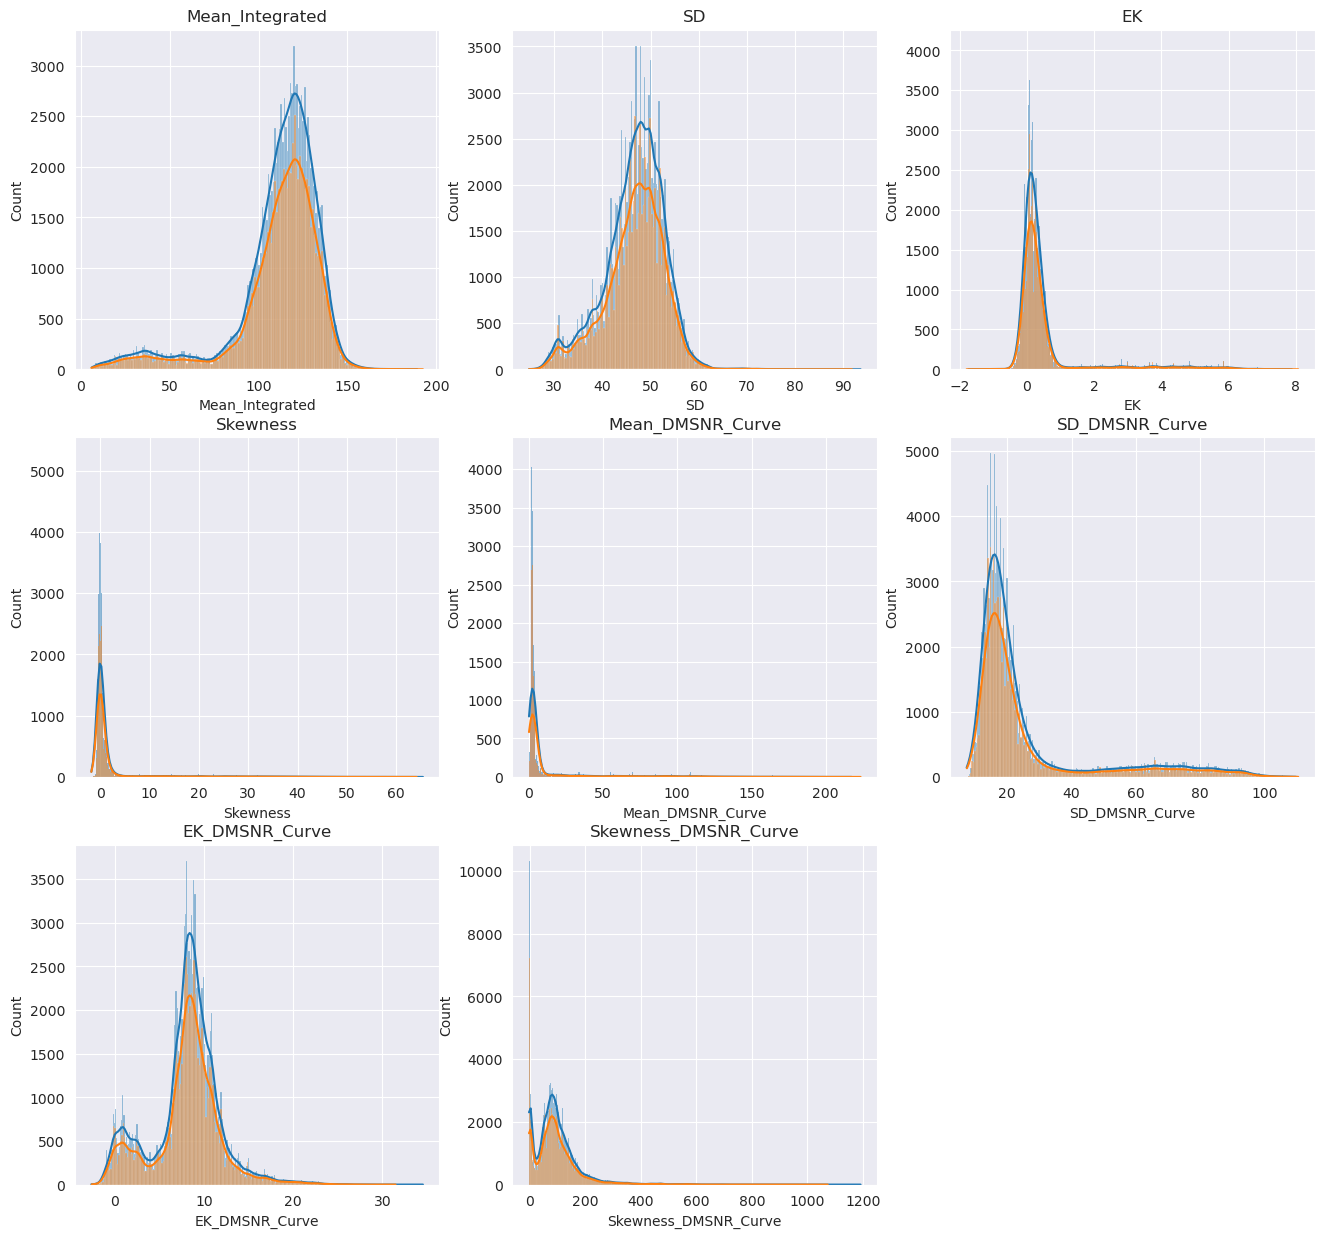

In [6]:
features = [col for col in train.columns if train[col].dtype=='float']
rows = int(np.ceil(len(features)/3)) 
plt.figure(figsize=(16,5*rows)) 
for i,col in enumerate(features): 
  plt.subplot(rows,3,i+1) 
  sns.histplot(train[col],kde=True) 
  sns.histplot(test[col], kde=True)
  plt.title(col)

### Takeaways
* All continuous
* Have quite different distributions, some skewed, some with long tails, one with lots of zeros
* train and test look pretty similar


## Target Distribution

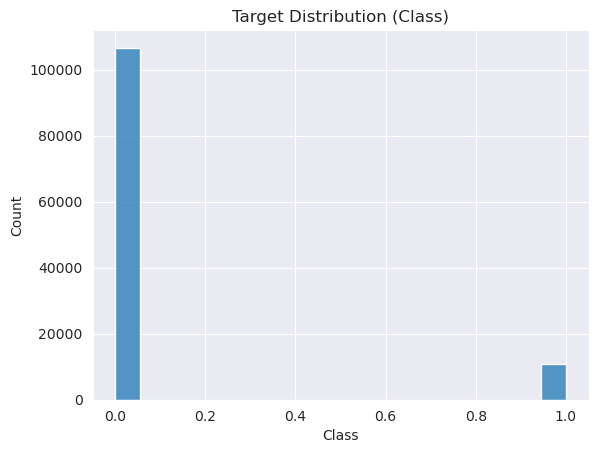

In [7]:
sns.histplot(train.Class)
plt.title('Target Distribution (Class)');

### Takeaways
* Class is imbalanced.  Should use Stratified Kfold
* Consider balancing with SMOTE, etc?

## Distribution of Features separated by Target

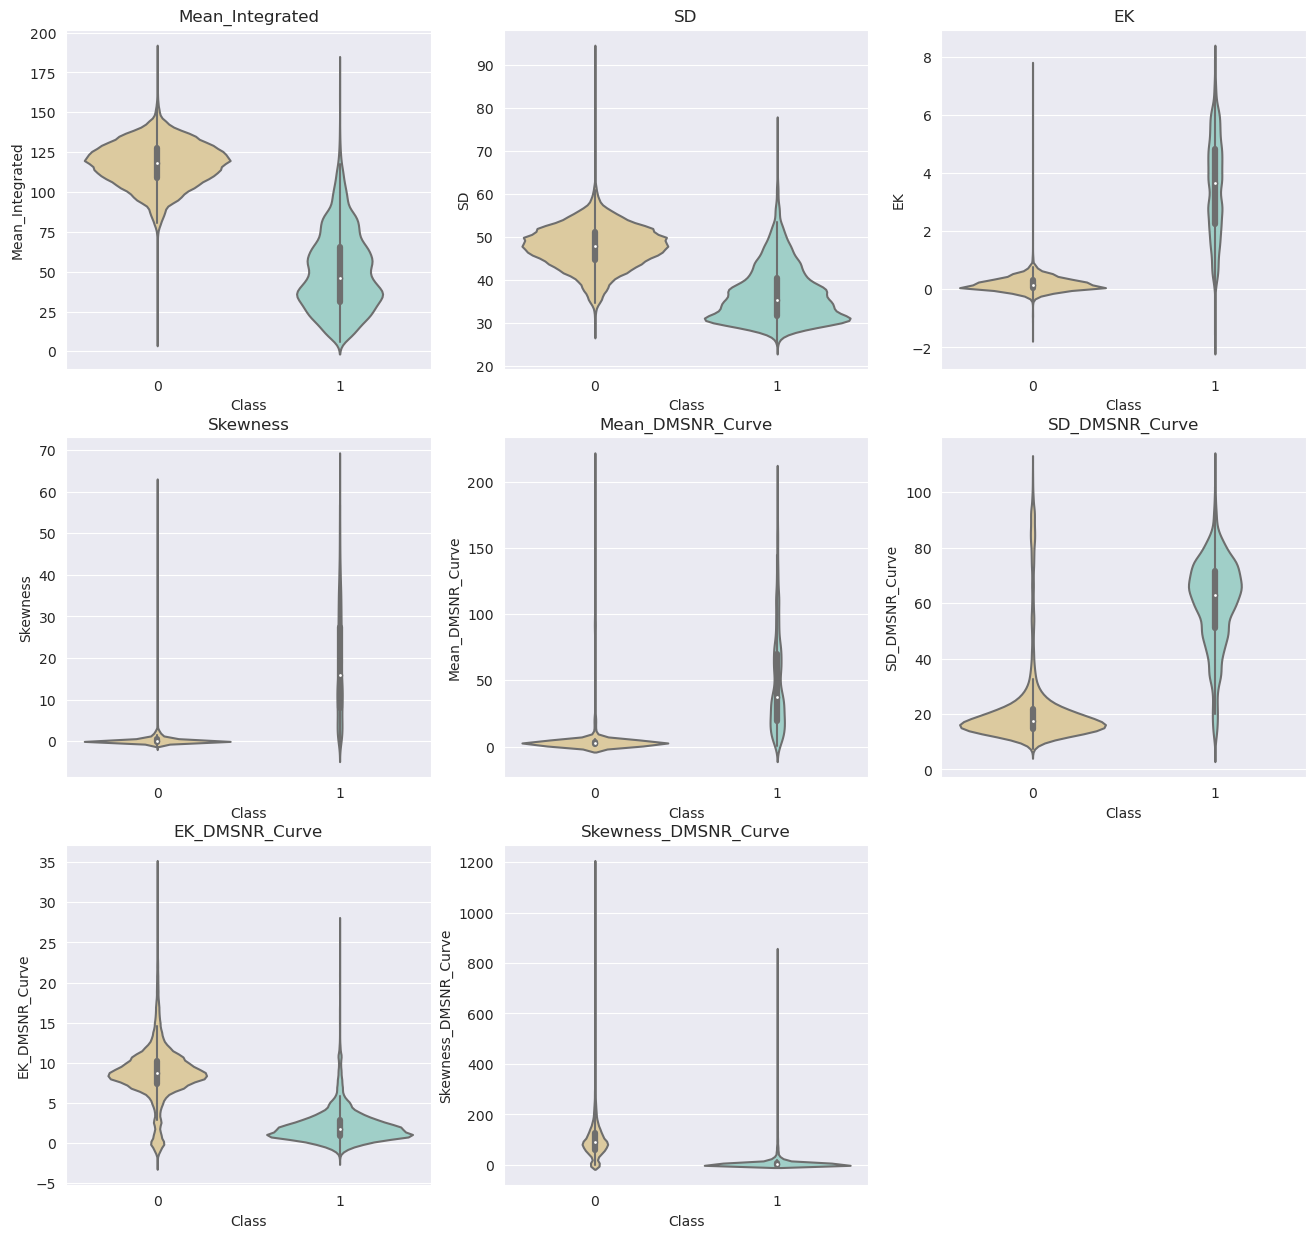

In [8]:
features = [col for col in train.columns if train[col].dtype=='float']
rows = int(np.ceil(len(features)/3)) 
plt.figure(figsize=(16,5*rows)) 
for i,col in enumerate(features): 
  plt.subplot(rows,3,i+1) 
  sns.violinplot(x=train.Class, y=train[col],palette='BrBG')
  plt.title(col)

Separation of means, so looks like we should be able to discrimiate well.

In [9]:
# train.groupby('Class').Skewness.mean()  # how can I loop through?

## Correlations

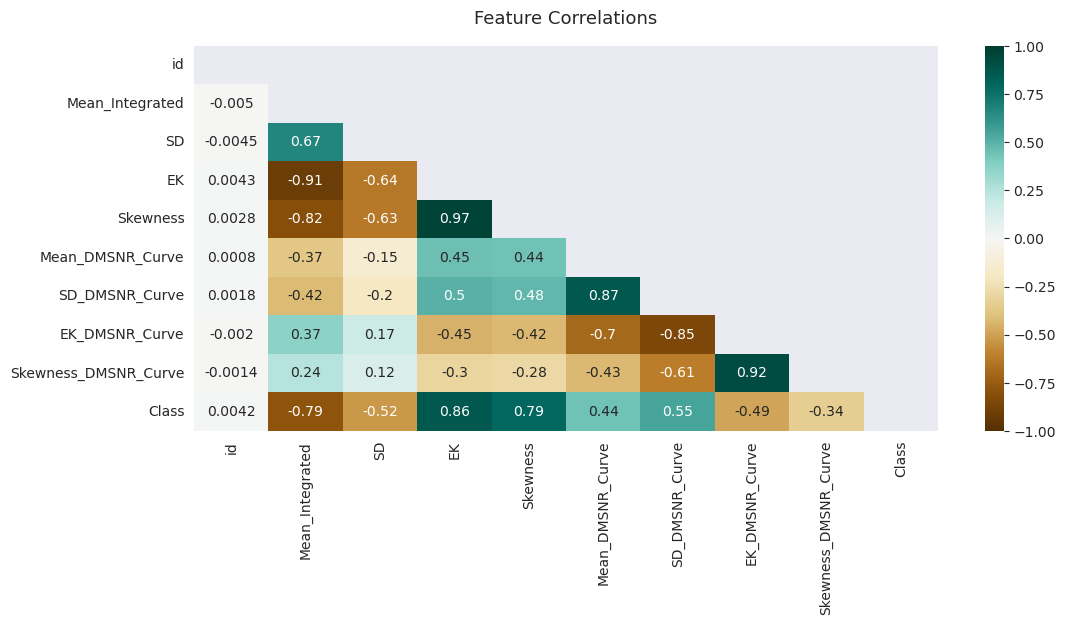

In [10]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Feature Correlations', fontdict={'fontsize':13}, pad=16);

### Takeaways
* Lots of these features have high correlation.  Not sure how to best deal with this.

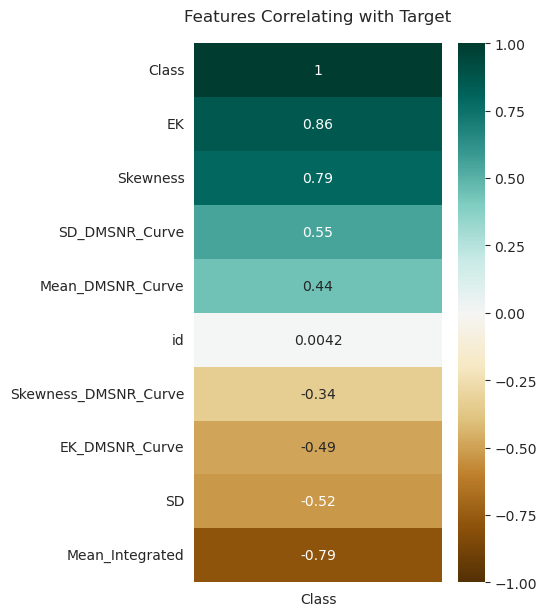

In [11]:
plt.figure(figsize=(4, 7))  # set size by num of features
heatmap = sns.heatmap(train.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':12}, pad=16);

## Domain Knowledge

[Source](https://as595.github.io/classification/)

Pulsars are “pulsating radio sources”, now known to be caused by rapidly rotating neutron stars. Neutron stars are the relics of dead massive stars, they’re small and extremely dense - think about something the same mass as the Sun crammed into a radius roughly the same as the M25 motorway around London. You can read all about them here.

A characteristic property of pulsars are the periodic bursts of emission produced by their radio emitting jets. As the pulsar rotates, the direction of this emission also rotates and astronomers see a pulse of radio emission each time one of the jets points towards the Earth.

Identifying them in the data streams from radio telescopes is not trivial. There are lots of man-made sources of radio frequency interference that can mimic the signals from pulsars. Classifying candidate data samples as pulsar or not pulsar is serious business.

In order to classify a data sample as a pulsar or not a pulsar, we need to be able to extract some information on the data sample that can characterise its class. The individual bursts of emission from a pulsar (i.e. the pulses) do not have a constant shape or amplitude, so individually they’re not very useful for uniquely identifying a pulsar.

Because the individual pulses are all different, astronomers stack them up and create an average integrated pulse profile to characterise a particular pulsar:

![stacked pulses](https://allofyourbases.files.wordpress.com/2019/03/pulsestack-e1552071632736.gif)

Additionally the pulse will arrive at different times across different radio frequencies. The delay from frequency to frequency is caused by the ionised inter-stellar medium and is known as the dispersion.  Astronomers fit for the shape of the delay in order to compensate for its effect, but there’s always an uncertainty associated with the fit. That is expressed in the DM-SNR (“dispersion-measure-signal-to-noise-ratio”) curve, which looks like this:

When you put these two curves together it means that for each pulsar candidate there are eight numerical characteristic features that can be extracted as standard: four from the integrated pulse profile and four from the DM-SNR curve:

DMSNR: dispersion-measure-signal-to-noise-ratioDMSNR: dispersion-measure-signal-to-noise-ratio


# Preprocessing

## Scale data

* Getting better results without scaling than with Standar, MinMax, or Robust scaling

In [12]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = RobustScaler()

# train[features] = pd.DataFrame(scaler.fit_transform(train[features]), columns = features)
# test[features] = pd.DataFrame(scaler.fit_transform(test[features]), columns = features)

## Remove outliers

* When have extra time, try the idea from [this discussion](https://www.kaggle.com/competitions/playground-series-s3e10/discussion/393093)

In [13]:
# outliers = train[
#     (train['Class']==1)&
#     (train['Mean_Integrated']>115)&
#     (train['SD']>45)&
#     (train['EK']<0.03)&
#     (train['Skewness']<1)&
#     (train['Mean_DMSNR_Curve']<20)
# ].index

## Setup CV

In [14]:
from sklearn.model_selection import StratifiedKFold

folds = 8

In [15]:
def run_cv_and_predict(train, test, features, model, seed):
    
    # initialize arrays 
    scores = []
    oof = np.zeros(train.shape[0])
    preds = np.zeros((test.shape[0],folds))

    # setup folding strategy
    skf = StratifiedKFold(n_splits=folds,random_state = seed,shuffle=True)

    # start cross validation
    cur_fold = 1
    for trn_idx, val_idx in skf.split(train[features], y):

        # split indicies into train and validation
        x_train = train[features].iloc[trn_idx]
        y_train = y.iloc[trn_idx]
        x_valid = train[features].iloc[val_idx]
        y_valid = y.iloc[val_idx]

        # fit model
        model.fit(x_train,y_train)

        # predict on validation set
        fold_preds = model.predict_proba(x_valid)[:,1]
        fold_preds = fold_preds.reshape(len(fold_preds)) # sbabwtdt
        oof[val_idx] = fold_preds

        # Compute scores
        fold_score = log_loss(y_valid,fold_preds)
        scores.append(fold_score)
        #print(f'Log Loss Score, fold {cur_fold}: {fold_score}')

        # predict on test set - store all fold preds (take mode later)
        test_preds = model.predict_proba(test[features])[:,1]
        test_preds = test_preds.reshape(len(test_preds))  # shouldn't have to do this.
        preds[:,cur_fold-1] = test_preds  
        cur_fold +=1
    
    # Print mean fold and oof score
    oof_score = log_loss(y,oof)
    print(f'Log Loss score: {np.mean(scores):.5f}, Stdev: {np.std(scores):.5f}, OOF score: {oof_score:.5f}')

    return (preds,scores,oof_score,oof)

# Run Models and Evaluation

Plan:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosted Trees
    * Catboost
    * XGBoost
    * LightGBM
5. ANN

In [16]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibrationDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier


In [17]:
y = train.Class

## Visualization functions

In [18]:
# Thanks to: AmbrosM, https://www.kaggle.com/competitions/playground-series-s3e10/discussion/393073
def calibration_display(y,oof):
    plt.figure(figsize=(10, 4))
    ax = plt.subplot(1, 2, 1) # calibration
    plt.title('Calibration')
    CalibrationDisplay.from_predictions(y, oof, n_bins=100, strategy='quantile', ax=ax)
    plt.subplot(1, 2, 2) # histogram
    plt.title('Histogram')
    plt.hist(oof, bins=100)
    plt.ylim(100)
    plt.show()

## Model 1: Logistic Regression

In [19]:
# from sklearn.linear_model import LogisticRegression

# models = [
#     LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
#     LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
#     LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
#     LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
#     ]

# lr_params = {'C':2,'solver':'newton-cg','max_iter':200}

# preds_lr,scores,oof_score,oof_lr = run_cv_and_predict(train,test,features,LogisticRegression(**lr_params),12)
#print(f'Solver = {lr_params['solver']}, C = {lr_params['C']}, max_iter = {max_iter}')

# First default run: LogLoss score: 0.37017, Stdev: 0.02571, OOF score: 0.37017, lb: .37458

# change to predict proba (from predict)
# Log Loss score: 0.03993, Stdev: 0.00203, OOF score: 0.03993, lb = .04322

# newton-cg,penalty='l2',max_iter=1000
# Log Loss score: 0.03983, Stdev: 0.00200, OOF score: 0.03983, lb = .04319 (very marginal improvement)

# add std scaler:
# Log Loss score: 0.03985, Stdev: 0.00199, OOF score: 0.03985

# C=2, newton-cg, max_iter: 200
# Log Loss score: 0.03983, Stdev: 0.00200, OOF score: 0.03983


### Logistic Regression Performance Evaluation

In [20]:
#calibration_display(y,oof_lr)

## Model 2. Decision Tree

In [21]:
# from sklearn.tree import DecisionTreeClassifier

# model_dt = DecisionTreeClassifier(random_state=12,max_depth=4)
# preds_dt,scores,oof_score,oof_dt = run_cv_and_predict(train,test,features,model_dt)

# calibration_display(y,oof_dt)
# default is pretty bad: 
# Log Loss score: 0.53558, Stdev: 0.03162, OOF score: 0.53558
# when change to max_depth = 4: 
# Log Loss score: 0.03884, Stdev: 0.00181, OOF score: 0.03884, lb = .03878
# max depth = 3 (see saved dt's)
# Log Loss score: 0.04305, Stdev: 0.00224, OOF score: 0.04305
# max depth = 5
# Log Loss score: 0.03909, Stdev: 0.00233, OOF score: 0.03909

# add std scaler:
# Log Loss score: 0.03884, Stdev: 0.00181, OOF score: 0.03884

Has a large spike at close to 0.0

## Decision Tree Analysis/Visualization

In [22]:
# model_dt.feature_importances_
# indices = np.argsort(model_dt.feature_importances_)[::-1]
# g = sns.barplot(y=train.columns[indices[0:16]],x = model_dt.feature_importances_[indices[0:16]] , orient='h')


### Takeaways
* Everything is SD (?)
    * Need to look more into why this is.

## Sklearn Tree Visualization

In [23]:
# from sklearn import tree

# # text_representation = tree.export_text(model_dt)
# # print(text_representation)

# fig = plt.figure(figsize=(18,8))
# fig = tree.plot_tree(model_dt, feature_names=features, filled=True)

# plt.savefig('dt_max_depth_4.png')

# hard to read


## DTreeViz Visualization

In [24]:
# !pip install dtreeviz

In [25]:
# import dtreeviz

# viz_model = dtreeviz.model(model_dt,
#                            X_train=train[features], y_train=y,
#                            feature_names=features,
#                            target_name='Class',
#                            class_names=['Not Pulsar','Pulsar'])

# viz_model.view()     # render as SVG into internal object 
#v.show()
# #v.save("treeviz1.svg")  # optionally save as svg

In [26]:
# v = viz_model.view()
# v.save('dtreeviz_dt_max_d_4.svg')

## 3. Random Forest

In [27]:
# %%time

# # 1250 est takes 51 minutes
# for est in [1250]:
#     model_rf = RandomForestClassifier(n_estimators=est)

#     preds_rf,scores,oof_score,oof_rf = run_cv_and_predict(train,test,features,model_rf,12)

#     calibration_display(y,oof_rf)
#     print(f'Estimators: {est}, Log Loss score: {np.mean(scores):.5f}, Stdev: {np.std(scores):.5f}, OOF score: {oof_score:.5f}')


# model_rf.feature_importances_
# indices = np.argsort(model_rf.feature_importances_)[::-1]
# g = sns.barplot(y=features, x=model_cat.feature_importances_, orient='h')


# default settings: 
# Log Loss score: 0.06935, Stdev: 0.00753, OOF score: 0.06935  ...this is worse than dt or lr!

# n_estimators = 100
# Log Loss score: 0.06804, Stdev: 0.00733, OOF score: 0.06804

# n_estimators = 200
# Log Loss score: 0.05720, Stdev: 0.00712, OOF score: 0.05720

# n_estimators = 400
# Log Loss score: 0.04871, Stdev: 0.00523, OOF score: 0.04871
# Estimators: 500, Log Loss score: 0.04682, Stdev: 0.00634, OOF score: 0.04682
# Estimators: 700, Log Loss score: 0.04570, Stdev: 0.00746, OOF score: 0.04570

# Estimators: 500, Log Loss score: 0.04719, Stdev: 0.00672, OOF score: 0.04719 (used for submission)
# Estimators: 700, Log Loss score: 0.04497, Stdev: 0.00548, OOF score: 0.04497
# Estimators: 850, Log Loss score: 0.04449, Stdev: 0.00740, OOF score: 0.04449
# Estimators: 1000, Log Loss score: 0.04210, Stdev: 0.00507, OOF score: 0.04211
# Estimators: 1250, Log Loss score: 0.04118, Stdev: 0.00562, OOF score: 0.04118, ( used for submission)
# Estimators: 1500, Log Loss score: 0.04207, Stdev: 0.00499, OOF score: 0.04207


## 4. Catboost

In [28]:
# new cb params https://www.kaggle.com/code/tetsutani/ps3e10-eda-xgb-lgbm-cat-ensemble-score-0-03153
cb_params = {
    #'iterations': self.n_estimators,
    'depth': 3,
    'learning_rate': 0.15687380686250746,
    'l2_leaf_reg': 4.0368544113430485,
    'random_strength': 0.1279482215776108,
    'max_bin': 238,
    'od_wait': 49,
    'one_hot_max_size': 39,
    'grow_policy': 'SymmetricTree',
    'bootstrap_type': 'Bayesian',
    'od_type': 'Iter',
    'loss_function': 'Logloss',
    #'random_state': 12
}

# model_cat = CatBoostClassifier(**cb_params, verbose=False)# ,task_type='GPU')

# preds_cat,scores_cat,oof_score,oof_cat = run_cv_and_predict(train,test,features,model_cat,12)

# calibration_display(y,oof_cat)

# model_cat.feature_importances_
# indices = np.argsort(model_cat.feature_importances_)[::-1]
# g = sns.barplot(y=features, x=model_cat.feature_importances_, orient='h')

# # default cat: Log Loss score: 0.03183, Stdev: 0.00237, OOF score: 0.03183, lb = .03226

# add std scaler: Log Loss score: 0.03166, Stdev: 0.00214, OOF score: 0.03166
# robust scaler: Log Loss score: 0.03187, Stdev: 0.00233, OOF score: 0.03187
# MinMax scaler: (forgot to write results)

# std scaling:Log Loss score: 0.03166, Stdev: 0.00214, OOF score: 0.03166, lb = .03271

# new hyper params: 
# Log Loss score: 0.03088, Stdev: 0.00206, OOF score: 0.03088 (better - try solo model)

In [29]:
#model_cat.get_all_params()

In [30]:
# from sklearn.calibration import CalibratedClassifierCV

# calibrated_clf = CalibratedClassifierCV(model_cat, cv=8)

# # perform 8-fold cross-validation on the calibrated classifier
# scores = cross_val_score(calibrated_clf, X, y, cv=8)

# # print the mean cross-validation score
# print("Mean cross-validation score: {:.3f}".format(scores.mean()))

## 5. XGBoost

In [31]:
xgb_params = {
    "booster": "gbtree",
    "objective": "binary:logistic", 
    "eta": 0.05,
    "gamma": 0.0,
    "alpha": 0.0,
    "lambda": 1.0,
    "min_child_weight": 1,
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    #"random_state": 71,
    "verbosity": 0,
    'n_estimators': 500,
    "eval_metric": "logloss"
}

# new xgb params from notebook: https://www.kaggle.com/code/tetsutani/ps3e10-eda-xgb-lgbm-cat-ensemble-score-0-03153
# xgb_params = {
#     'n_estimators': 500,
#     'max_depth': 4,
#     'learning_rate': 0.06333221939055333,
#     'min_child_weight': 4,
#     'gamma': 5.301218558776368e-08,
#     'subsample': 0.41010429946197946,
#     'colsample_bytree': 0.8298539920447499,
#     'reg_alpha': 0.000517878113716743,
#     'reg_lambda': 0.00030121415155097723,
#     'n_jobs': -1,
#     'objective': 'binary:logistic',
#     'verbosity': 0,
#     'eval_metric': 'logloss',
#     'random_state': 12,
# }
               
# model_xgb = XGBClassifier(**xgb_params) #**xgb_params)         
# preds_xgb,scores_xgb,oof_score,oof_xgb = run_cv_and_predict(train,test,features, model_xgb,12)
# calibration_display(y,oof_xgb)


# default params
# Log Loss score: 0.03282, Stdev: 0.00226, OOF score: 0.03282

# 3000,7,.0018
# Log Loss score: 0.03303, Stdev: 0.00179, OOF score: 0.03303, lb = .03400

# std scaler
# Log Loss score: 0.03267, Stdev: 0.00210, OOF score: 0.03267, lb = .03345

# new params
# Log Loss score: 0.03413, Stdev: 0.00175, OOF score: 0.03413, lb = .03615

# params 2, same but 1000 iterations
# Log Loss score: 0.03108, Stdev: 0.00207, OOF score: 0.03108, lb = .3247  (bst for xgb)

# params2 with 2000 iterations
# Log Loss score: 0.03268, Stdev: 0.00242, OOF score: 0.03268

# params2 with 1500 iterations
# Log Loss score: 0.03182, Stdev: 0.00229, OOF score: 0.03182

# params2 with 500 estimators
#Log Loss score: 0.03065, Stdev: 0.00199, OOF score: 0.03065, lb = .3225

# params2 with 750 estimators
# Log Loss score: 0.03078, Stdev: 0.00204, OOF score: 0.03078

# 400 est:
# Log Loss score: 0.03061, Stdev: 0.00196, OOF score: 0.03061, lb = .3234

# 300 est:
# Log Loss score: 0.03073, Stdev: 0.00192, OOF score: 0.03073

# 500 est, no scaler:
# Log Loss score: 0.03065, Stdev: 0.00200, OOF score: 0.03065

# new params from public notebook
# Log Loss score: 0.03098, Stdev: 0.00214, OOF score: 0.03098

In [32]:
#model_xgb.get_params()

## 6. MLPClassifier

In [33]:
# from sklearn.neural_network import MLPClassifier

# # Create a shallow neural network with one hidden layer of 10 neurons
# model_mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
# preds_mlp,scores_mlp,oof_score,oof_mlp = run_cv_and_predict(train,test,features, model_mlp,12)
# calibration_display(y,oof_mlp)

# # Log Loss score: 0.03660, Stdev: 0.00233, OOF score: 0.03660

## 7. LGBM

In [34]:
lgb_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.19503709130426908,
    'subsample': 0.016314517193550798,
    'colsample_bytree': 0.4430207740011624,
    'reg_alpha': 2.3355195856646724e-06,
    'reg_lambda': 0.6375339245312847,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 12
}



## Two Model Ensemble

### Optimizing Best Ensemble Ratio

In [35]:
# # determine the best ensemble
# ens_scores = []
# ratios = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
# for t in ratios:
#     oof_ens = t*oof_cat + (1.0-t)*oof_xgb  
#     score = log_loss(y,oof_ens)
#     ens_scores.append([t,score])
#     #print(f'{n}*cat + {1.0-n}*xgb, Ensemble log loss: {score:.5f}')

# ens_scores = np.array(ens_scores)
# plt.plot(ens_scores[:,0],ens_scores[:,1])

In [36]:
# # find idx of minimum
# min_idx = ens_scores[:,1].argmin()
# ratio1 = ratios[min_idx]
# ratio2 = 1 - ratio1
# print(f'Optimal Ratio: {ratio1}:{ratio2:.1f}')
# print(f'Score = {ens_scores[min_idx,1]:.5f}')

# rf (500)() + cat, cv = .03134

In [37]:
# ens_scores[:,1].argmin()

### Look at score of optimal ratio

In [38]:
# oof_ens = ratio1*oof_cat + ratio2*oof_xgb 
# print(f'Ensemble log loss: {log_loss(y,oof_ens):.5f}')
# calibration_display(y,oof_ens)

## Three way model blend

In [39]:
# ratios = np.array([[.33333,.33333,.33333],[.66666,.166665,.166665],[.166665,.66666,.166665],[.166665,.166665,.66666]])
# ratios

In [40]:
# ens_scores = []
# for i in range(ratios.shape[0]):
#     oof_ens = ratios[i,0]*oof_cat + ratios[i,1]*oof_rf + ratios[i,2]*oof_xgb  
#     score = log_loss(y,oof_ens)
#     ens_scores.append([i,score])

In [41]:
# ens_scores = np.array(ens_scores)
# plt.plot(ens_scores[:,0],ens_scores[:,1])

In [42]:
# # manually experiement with some numbers
# oof_ens = .2*oof_cat + .1*oof_lr + .7*oof_xgb  
# score = log_loss(y,oof_ens)

# print(f'log loss score: {score:.5f}')

In [43]:
# min_idx = ens_scores[:,1].argmin()
# ratio = ratios[min_idx,:]

# print(f'Optimal Ratio (cat,rf,xgb): {ratio[0]},{ratio[1]},{ratio[2]}, Score = {ens_scores[min_idx,1]:.5f}')

### Use optimal ratio to generate predictions

In [44]:
# # triple ensemble
# preds_cat = preds_cat.mean(axis=1) * ratio[0]  # change this to automatically get min
# preds_rf = preds_lr.mean(axis=1)* ratio[1]
# preds_xgb = preds_xgb.mean(axis=1)* ratio[2]
# preds_ens = preds_cat + preds_rf + preds_xgb

# for dual model
# preds_cat = preds_cat.mean(axis=1) * ratio1  # change this to automatically get min
# preds_xgb = preds_xgb.mean(axis=1)* ratio2
# preds_ens = preds_cat + preds_xgb

# 
# Results:
# ens lr + dt, Ensemble log loss: 0.03597, lb = .03775
# ens cat + dt: Ensemble log loss: 0.03252, lb .03321
# ens cat + dt + lr: oof cv: .03379, lb = .034535
# ens cat + xgb std scaler: Ensemble log loss: 0.03121
# ens cat + xgb tuned (500) std scaler, Ensemble log loss: 0.03064, lb = .3219 (best)
# ens cat + xgb tuned (500), robust scaler, Ensemble log loss: 0.03072, lb = .3237
# ens cat + xgb tuned (500), no scaler, Ensemble log loss: .03070, lb = .03184 (best, but cv is a little worse).
#.475*oof_cat + .475*oof_xgb + .05*oof_lr = .03066 (best), but lb = .3317 (worse)
# .2*cat + .8*xgb (optimized below), cv = .3057 (best), lb = .03191 (slightly worse) but close to best
# .7cat + .3rf: cv = .3135, lb = .3234
# .7cat + .3rf, with 1250 nest instead of 500, cv = .3132, lb = .3225


# 3 way - cat, lr, xgb
# .166665 cat, lr, .66666 xgb, cv = .03079

# 3 way - cat, rf (500), xgb
# Optimal Ratio (cat, rf, xgb): 0.166665,0.166665,0.66666, Score = 0.03059



### Deotte Method

  * once you have all your optimized hyperparamters, train on the whole set with different seeds and average
  

In [45]:
cat_train_preds = np.zeros(train.shape[0])
cat_fold_preds = np.zeros(train.shape[0])
xgb_train_preds = np.zeros(train.shape[0])
xgb_fold_preds = np.zeros(train.shape[0])

cat_test_preds = np.zeros((test.shape[0],10))
xgb_test_preds = np.zeros((test.shape[0],10))

for i in tqdm(range(1,11)):
    
    # predict on cat with all data
    model_cat =  CatBoostClassifier(**cb_params,random_seed=i, verbose=False)# ,task_type='GPU')
    model_cat.fit(train[features],y)
    
    # predict on train
    cat_fold_preds = model_cat.predict_proba(train[features])[:,1]
    cat_fold_preds = cat_fold_preds.reshape(len(cat_fold_preds))  # shouldn't have to do this.
    cat_train_preds += cat_fold_preds/10 
    
    # predict on test
    test_preds = model_cat.predict_proba(test[features])[:,1]
    test_preds = test_preds.reshape(len(test_preds))  # shouldn't have to do this.
    cat_test_preds[:,i-1] = test_preds 
        

    # predict on xgb with all data
    model_xgb =  XGBClassifier(**xgb_params,random_seed=i, verbose=False)# ,task_type='GPU')
    model_xgb.fit(train[features],y)
    
    # predict on train
    xgb_fold_preds = model_xgb.predict_proba(train[features])[:,1]
    xgb_fold_preds = xgb_fold_preds.reshape(len(xgb_fold_preds))  # shouldn't have to do this.
    xgb_train_preds += xgb_fold_preds/10    
    
    # predict on test
    test_preds = model_xgb.predict_proba(test[features])[:,1]
    test_preds = test_preds.reshape(len(test_preds))  # shouldn't have to do this.
    xgb_test_preds[:,i-1] = test_preds  
   
    
# preds

  0%|          | 0/10 [00:00<?, ?it/s]

[[0.         0.02247309]
 [0.1        0.02257036]
 [0.2        0.02269164]
 [0.3        0.02283435]
 [0.4        0.02299866]
 [0.5        0.02318611]
 [0.6        0.02339956]
 [0.7        0.02364365]
 [0.8        0.0239261 ]
 [0.9        0.02426117]
 [1.         0.02468527]]


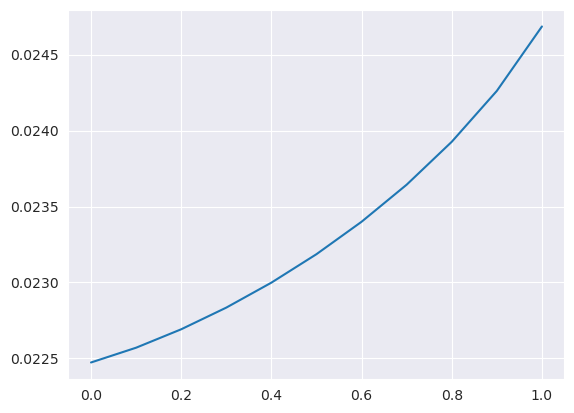

In [46]:
# determine the best ensemble for Deotte method
ens_scores = []
ratios = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
for t in ratios:
    oof_ens = t*cat_train_preds + (1.0-t)*xgb_train_preds  
    score = log_loss(y,oof_ens)
    ens_scores.append([t,score])
    #print(f'{n}*cat + {1.0-n}*xgb, Ensemble log loss: {score:.5f}')

ens_scores = np.array(ens_scores)
print(ens_scores)
plt.plot(ens_scores[:,0],ens_scores[:,1])

Deotte Ensemble log loss: 0.02247


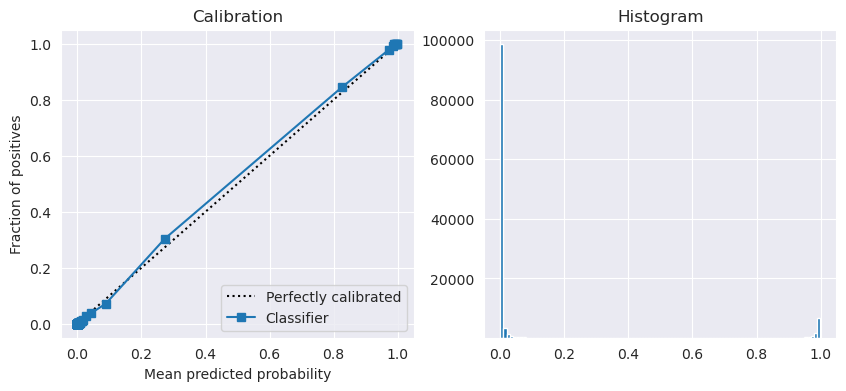

In [47]:
# look at ensemble of full data trained
cat_xgb = xgb_train_preds

print(f'Deotte Ensemble log loss: {log_loss(y,cat_xgb):.5f}')
calibration_display(y,cat_xgb)

# first run (.2cat + .8 xgb): .02096 (?), lb = .03203
# ??? whith only cat = .017797, lb = .03239  (a little worse)


In [48]:
cat_preds = cat_test_preds.mean(axis=1)
xgb_preds = xgb_test_preds.mean(axis=1)

ens_preds = .4*cat_preds + .6*xgb_preds
ens_preds

array([4.74906210e-05, 8.57230202e-04, 1.15176425e-04, ...,
       1.19858271e-04, 6.30953016e-02, 9.74910953e-01])

# Select Model

,id,Class
0,117564,0.000047
1,117565,0.000857
2,117566,0.000115
3,117567,0.073919
4,117568,0.002403


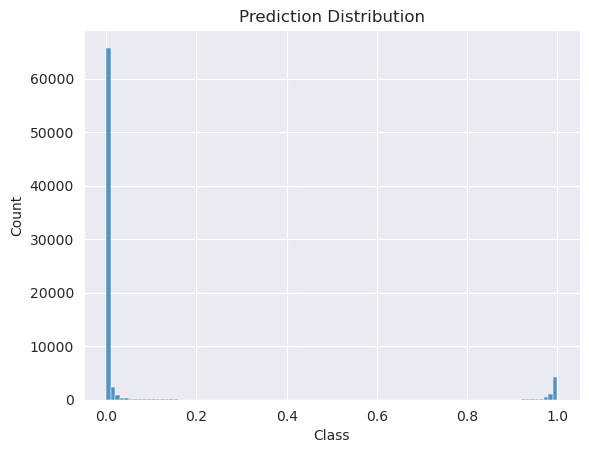

In [49]:
#ss.Class = preds_cat.mean(axis=1)
ss.Class = ens_preds
display(ss.head())
sns.histplot(ss.Class,bins=100)
plt.title('Prediction Distribution');

# Submission

In [50]:
ss.to_csv('submission.csv',index=False)
print('Submission away!')

Submission away!
